<a href="https://colab.research.google.com/github/PALLADIUM26/ML/blob/main/ML10_mpnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10.	Perform Multilayer perception neural network to classify flower type. Utilize number of hidden layer 5 and 200 to 400 iteration with learning rate. Try with different loss functions/ activation functions such as MSE, Cross entropy, sigmoid, tanh, ReLU along with different optimizer GD, SGD, Adam. Illustrate the result with performance metrics and observe Weight, Loss curve and accuracy curve.
Dataset: Iris dataset


In [ ]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy

In [ ]:
iris = pd.read_csv('/content/iris.csv', header=None)
iris.head()

,0,1,2,3,4
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa


In [ ]:
# Step 2: Load and prepare Iris data
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# One-hot encode the target
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 3: Build MLP model (with 5 hidden layers)
def build_model(activation='relu', loss_fn='mse', optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation=activation))
    for _ in range(4):  # 5 layers in total
        model.add(Dense(64, activation=activation))
    model.add(Dense(3, activation='softmax'))  # Output layer

    # Choose optimizer
    if optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate)  # Default fallback

    # Choose loss function
    if loss_fn == 'mse':
        loss = MeanSquaredError()
    elif loss_fn == 'crossentropy':
        loss = CategoricalCrossentropy()
    else:
        loss = MeanSquaredError()
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    return model

In [ ]:
# Step 4: Train and evaluate the model
activation = 'relu'              # Try: 'sigmoid', 'tanh', 'relu'
loss_fn = 'crossentropy'         # Try: 'mse', 'crossentropy'
optimizer = 'adam'               # Try: 'sgd', 'adam'
learning_rate = 0.01
epochs = 300

model = build_model(activation, loss_fn, optimizer, learning_rate)
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


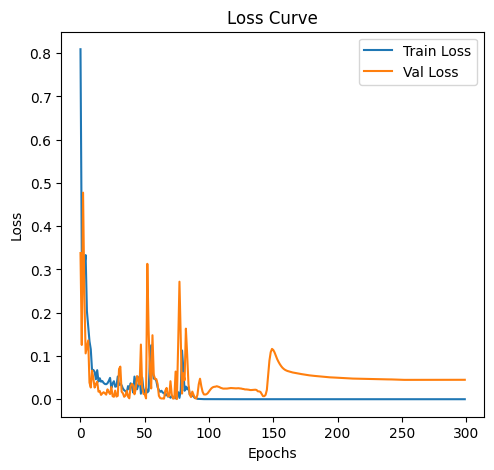

In [ ]:
# Step 5: Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))
# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

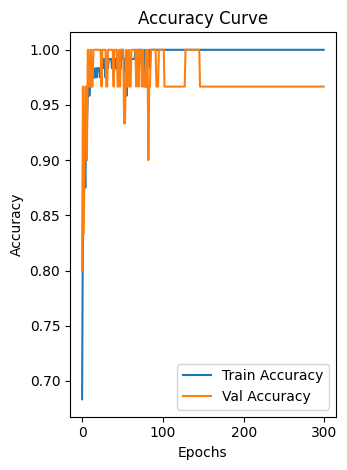

In [ ]:
# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Step 6: Final Evaluation on Test Set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Final Test Accuracy: {accuracy*100:.2f}% | Loss: {loss:.4f}")


✅ Final Test Accuracy: 96.67% | Loss: 0.0449
